Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2828 - accuracy: 0.9193 - val_loss: 0.1411 - val_accuracy: 0.9573
Epoch 2/10
 - 5s - loss: 0.1115 - accuracy: 0.9678 - val_loss: 0.0916 - val_accuracy: 0.9723
Epoch 3/10
 - 5s - loss: 0.0718 - accuracy: 0.9793 - val_loss: 0.0815 - val_accuracy: 0.9770
Epoch 4/10
 - 5s - loss: 0.0511 - accuracy: 0.9851 - val_loss: 0.0716 - val_accuracy: 0.9789
Epoch 5/10
 - 5s - loss: 0.0383 - accuracy: 0.9891 - val_loss: 0.0660 - val_accuracy: 0.9803
Epoch 6/10
 - 5s - loss: 0.0278 - accuracy: 0.9924 - val_loss: 0.0682 - val_accuracy: 0.9788
Epoch 7/10
 - 5s - loss: 0.0215 - accuracy: 0.9944 - val_loss: 0.0642 - val_accuracy: 0.9803
Epoch 8/10
 - 5s - loss: 0.0146 - accuracy: 0.9967 - val_loss: 0.0621 - val_accuracy: 0.9808
Epoch 9/10
 - 5s - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0601 - val_accuracy: 0.9809
Epoch 10/10
 - 5s - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.0610 - val_accuracy: 0.9808
Base line error: 1.

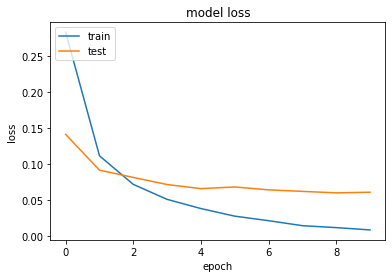

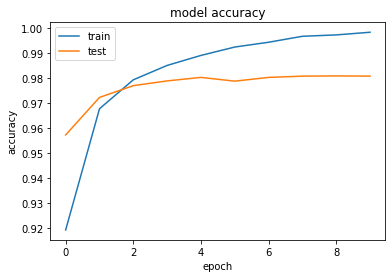

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import adam

seed=7
numpy.random.seed(seed)

#load data
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()


num_pixel=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixel).astype('float32')
X_test=X_test.reshape(X_test.shape[0],num_pixel).astype('float32')


X_train=X_train/255
X_test=X_test/255

Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)
num_classes=Y_test.shape[1]

def baseline_model():
  model=Sequential()
  model.add(Dense(num_pixel,input_dim=num_pixel,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

model=baseline_model()
# history=model.fit(X_train,Y_train,validation_split=0.33,nb_epoch=10,batch_size=200,verbose=2)
# print(history.history.keys())
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=200,verbose=2)
scores=model.evaluate(X_test,Y_test,verbose=0)
print("Base line error: %.2f%%" %(100-scores[1]*100))

fig1=plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

fig2=plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.show()
